#Linear regression
#Random forest
#Decision tree

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [161]:
iris = pd.read_csv("C:\\Users\\Is computer\\Desktop\\Codsoft\\Iris_flower_classification\\IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
#Data Dimensions
iris.shape

(150, 5)

In [14]:
#Data Description
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
#Species counts
iris.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
#Basic summary statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
#Checking missing values in variables
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

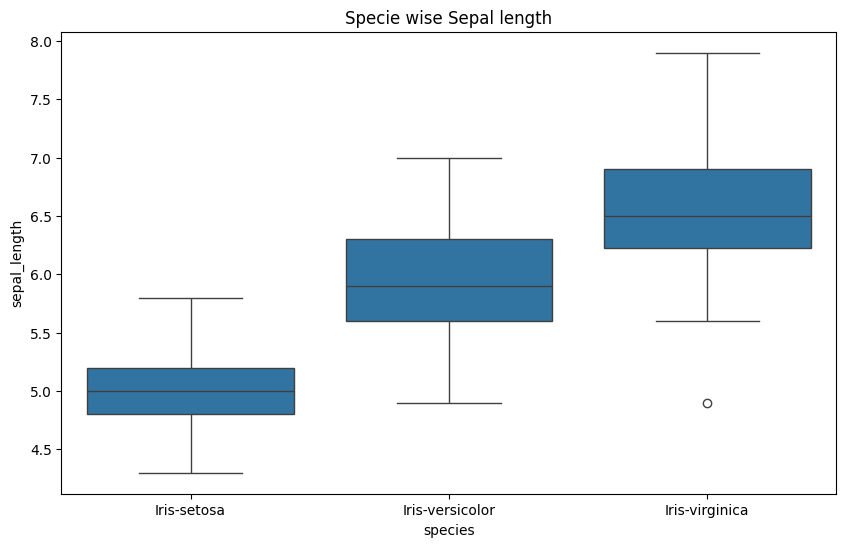

In [24]:
#Specie wise Boxplot of sepal length
plt.figure(figsize = (10,6))
sns.boxplot(x=iris['species'], y=iris['sepal_length'])
plt.title("Specie wise Sepal length")
plt.show()

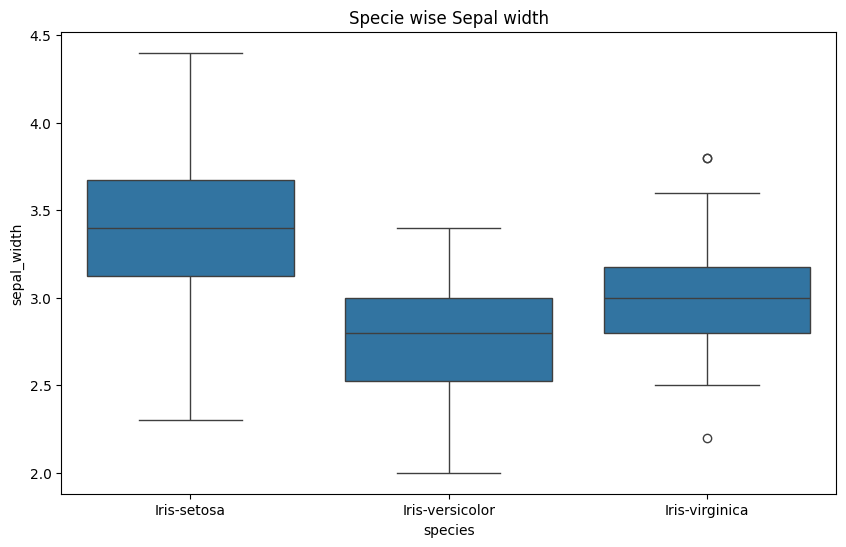

In [25]:
#Specie wise Boxplot of sepal Width
plt.figure(figsize = (10,6))
sns.boxplot(x=iris['species'], y=iris['sepal_width'])
plt.title("Specie wise Sepal width")
plt.show()

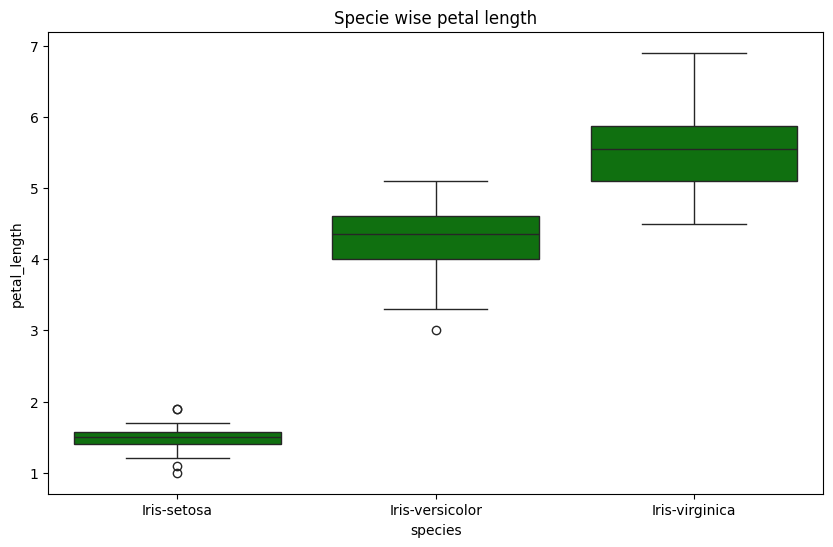

In [27]:
#Specie wise Boxplot of Petal length
plt.figure(figsize = (10,6))
sns.boxplot(x=iris['species'], y=iris['petal_length'], color = 'green')
plt.title("Specie wise petal length")
plt.show()

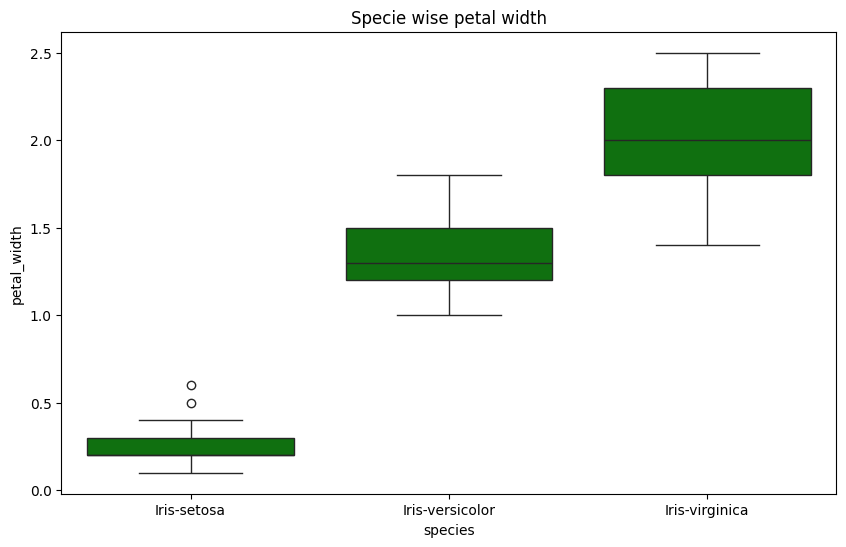

In [28]:
#Specie wise Boxplot of Petal width
plt.figure(figsize = (10,6))
sns.boxplot(x=iris['species'], y=iris['petal_width'], color = 'green')
plt.title("Specie wise petal width")
plt.show()

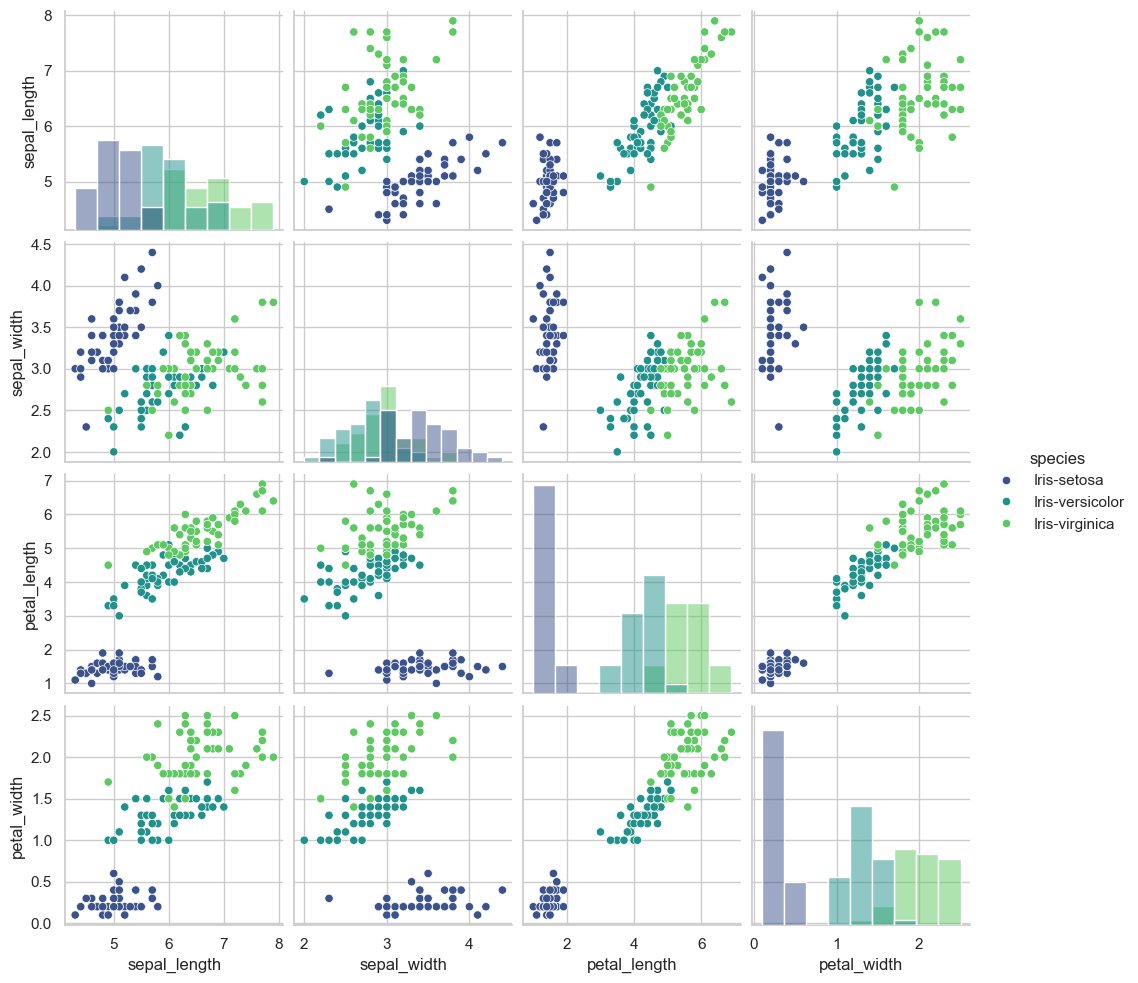

In [44]:
#Specie wise pair histogram plot
sns.pairplot(iris, hue='species', diag_kind='hist', palette='viridis')
plt.show()

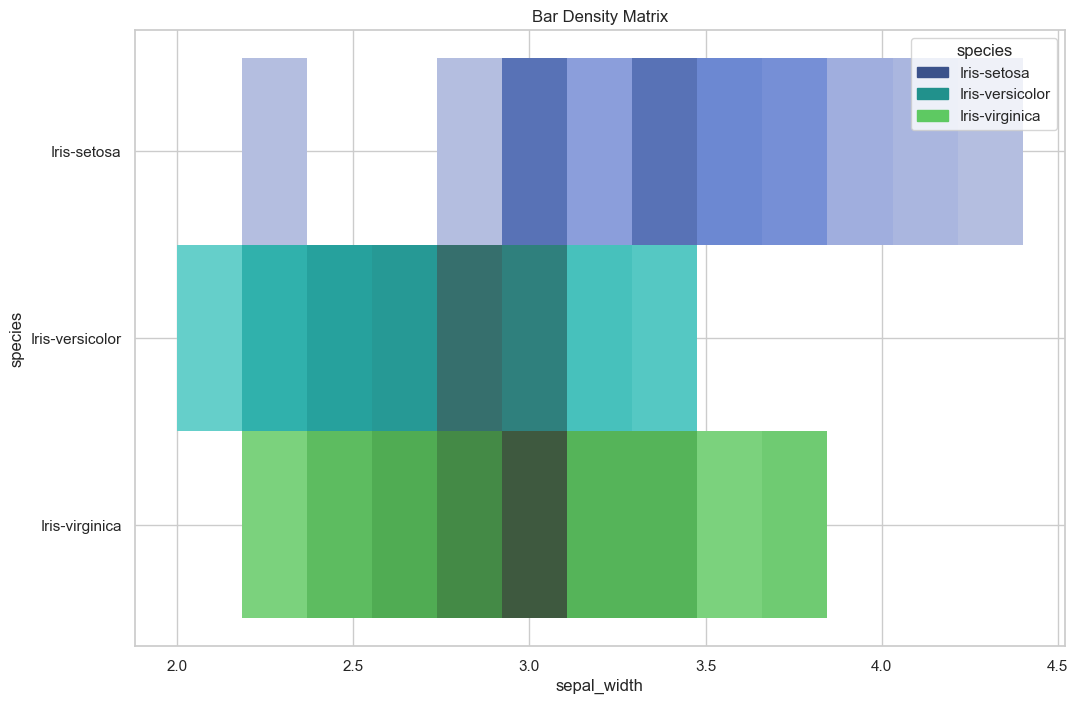

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
sns.histplot(
    iris, x="sepal_length", y="species",
    hue="species", multiple="stack",
    palette="viridis", shrink=0.8
)

plt.title('Sepal length Bar Density Matrix')
plt.show()

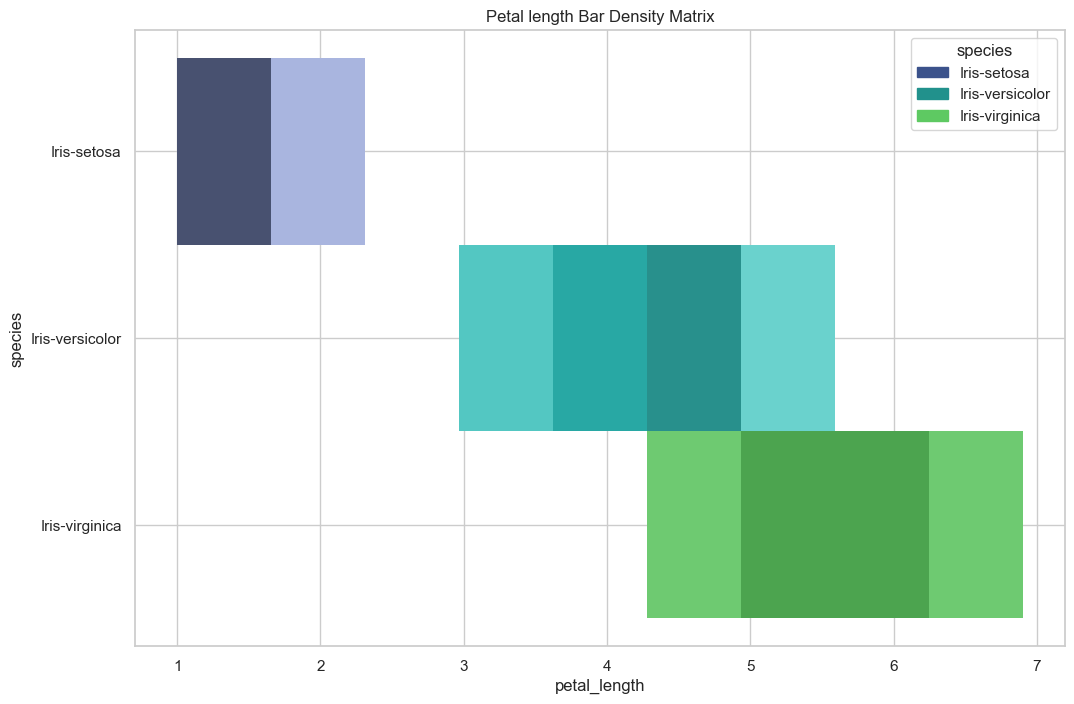

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
sns.histplot(
    iris, x="petal_length", y="species",
    hue="species", multiple="stack",
    palette="viridis", shrink=0.8
)

plt.title('Petal length Bar Density Matrix')
plt.show()

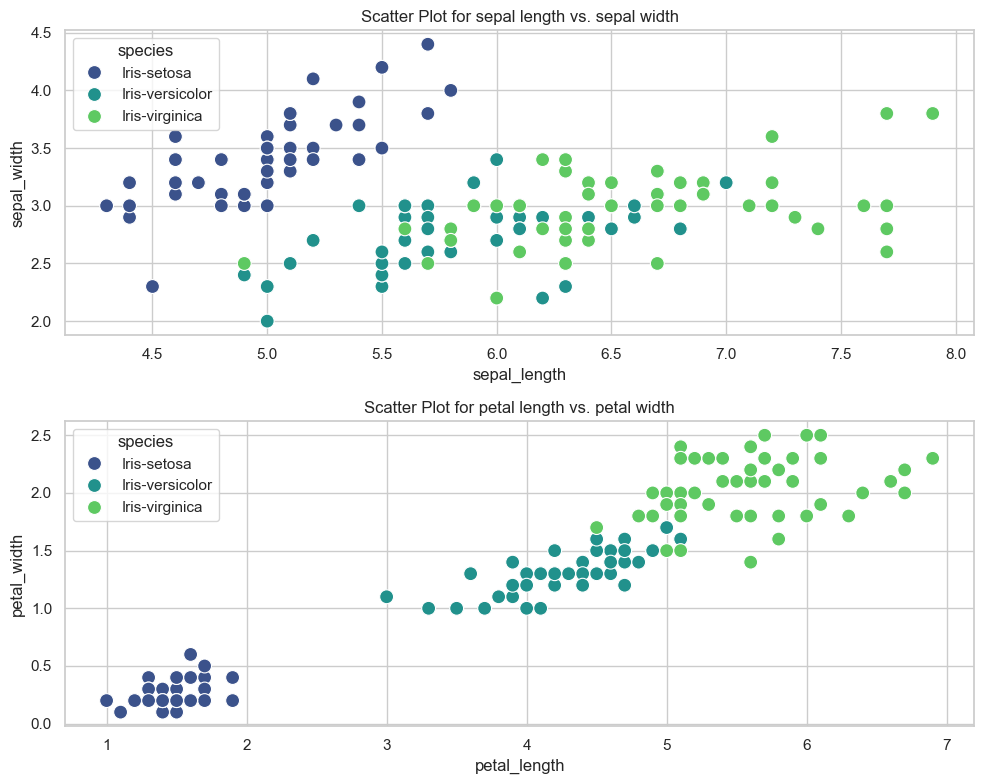

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.scatterplot(x='sepal_length', y='sepal_width', data=iris, hue='species', palette='viridis', s=100, ax=axes[0])
axes[0].set_title('Scatter Plot for sepal length vs. sepal width')

sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species', palette='viridis', s=100, ax=axes[1])
axes[1].set_title('Scatter Plot for petal length vs. petal width')

plt.tight_layout()
plt.show()

In [162]:
#Data Spliting
iris['species'], _ = pd.factorize(iris['species'])
y = iris['species']
x = iris.drop('species', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, test_size=0.2)

Mean Squared Error: 0.04584842410920061


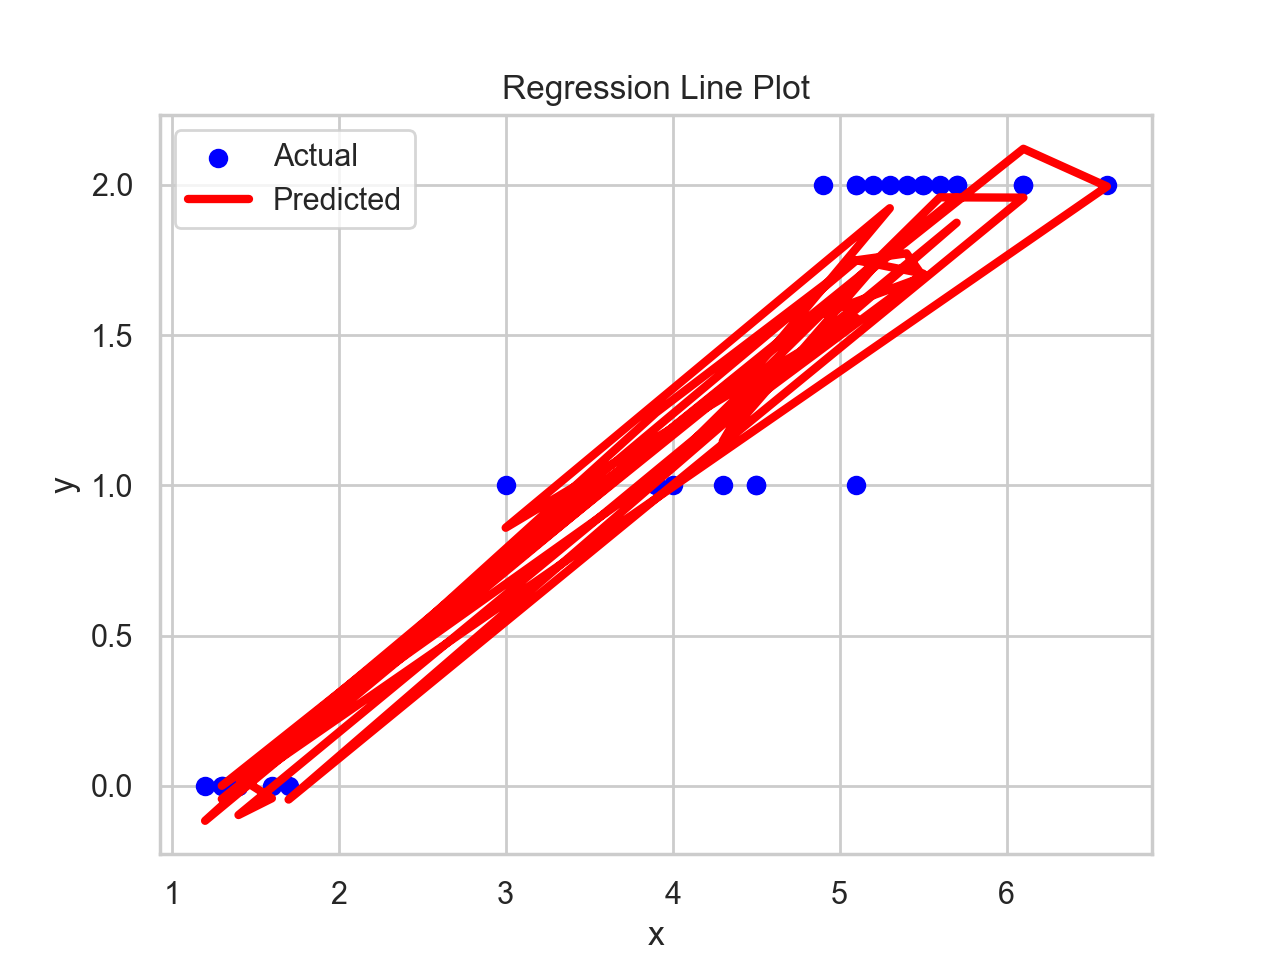

In [166]:
#Linear Regression Model
lr = LinearRegression()
fit1 = lr.fit(x_train, y_train)
y_pred = fit1.predict(x_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_lr}')

#Regression line plot
plt.scatter(x_test['petal_length'], y_test, color='blue', label='Actual')
plt.plot(x_test['petal_length'], y_pred, color='red', linewidth=3, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Regression Line Plot')
plt.show()

Mean Squared Error: 0.027113333333333326


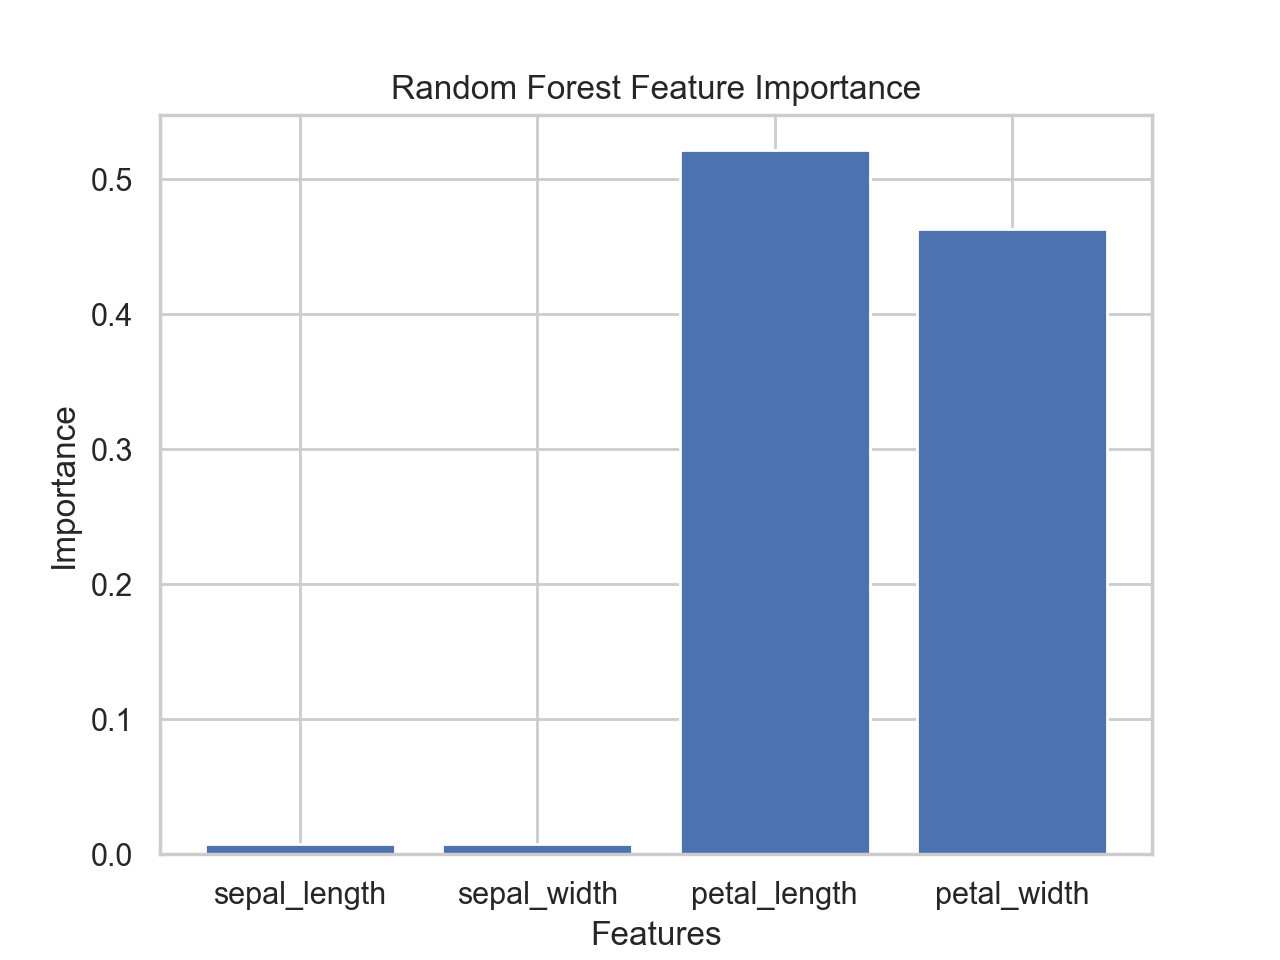

In [165]:
#Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_rf}')

# Feature importance
feature_importance = rf_model.feature_importances_

# Visualize feature importance
plt.bar(range(len(feature_importance)), feature_importance, tick_label=x.columns)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

Mean Squared Error: 0.03333333333333333


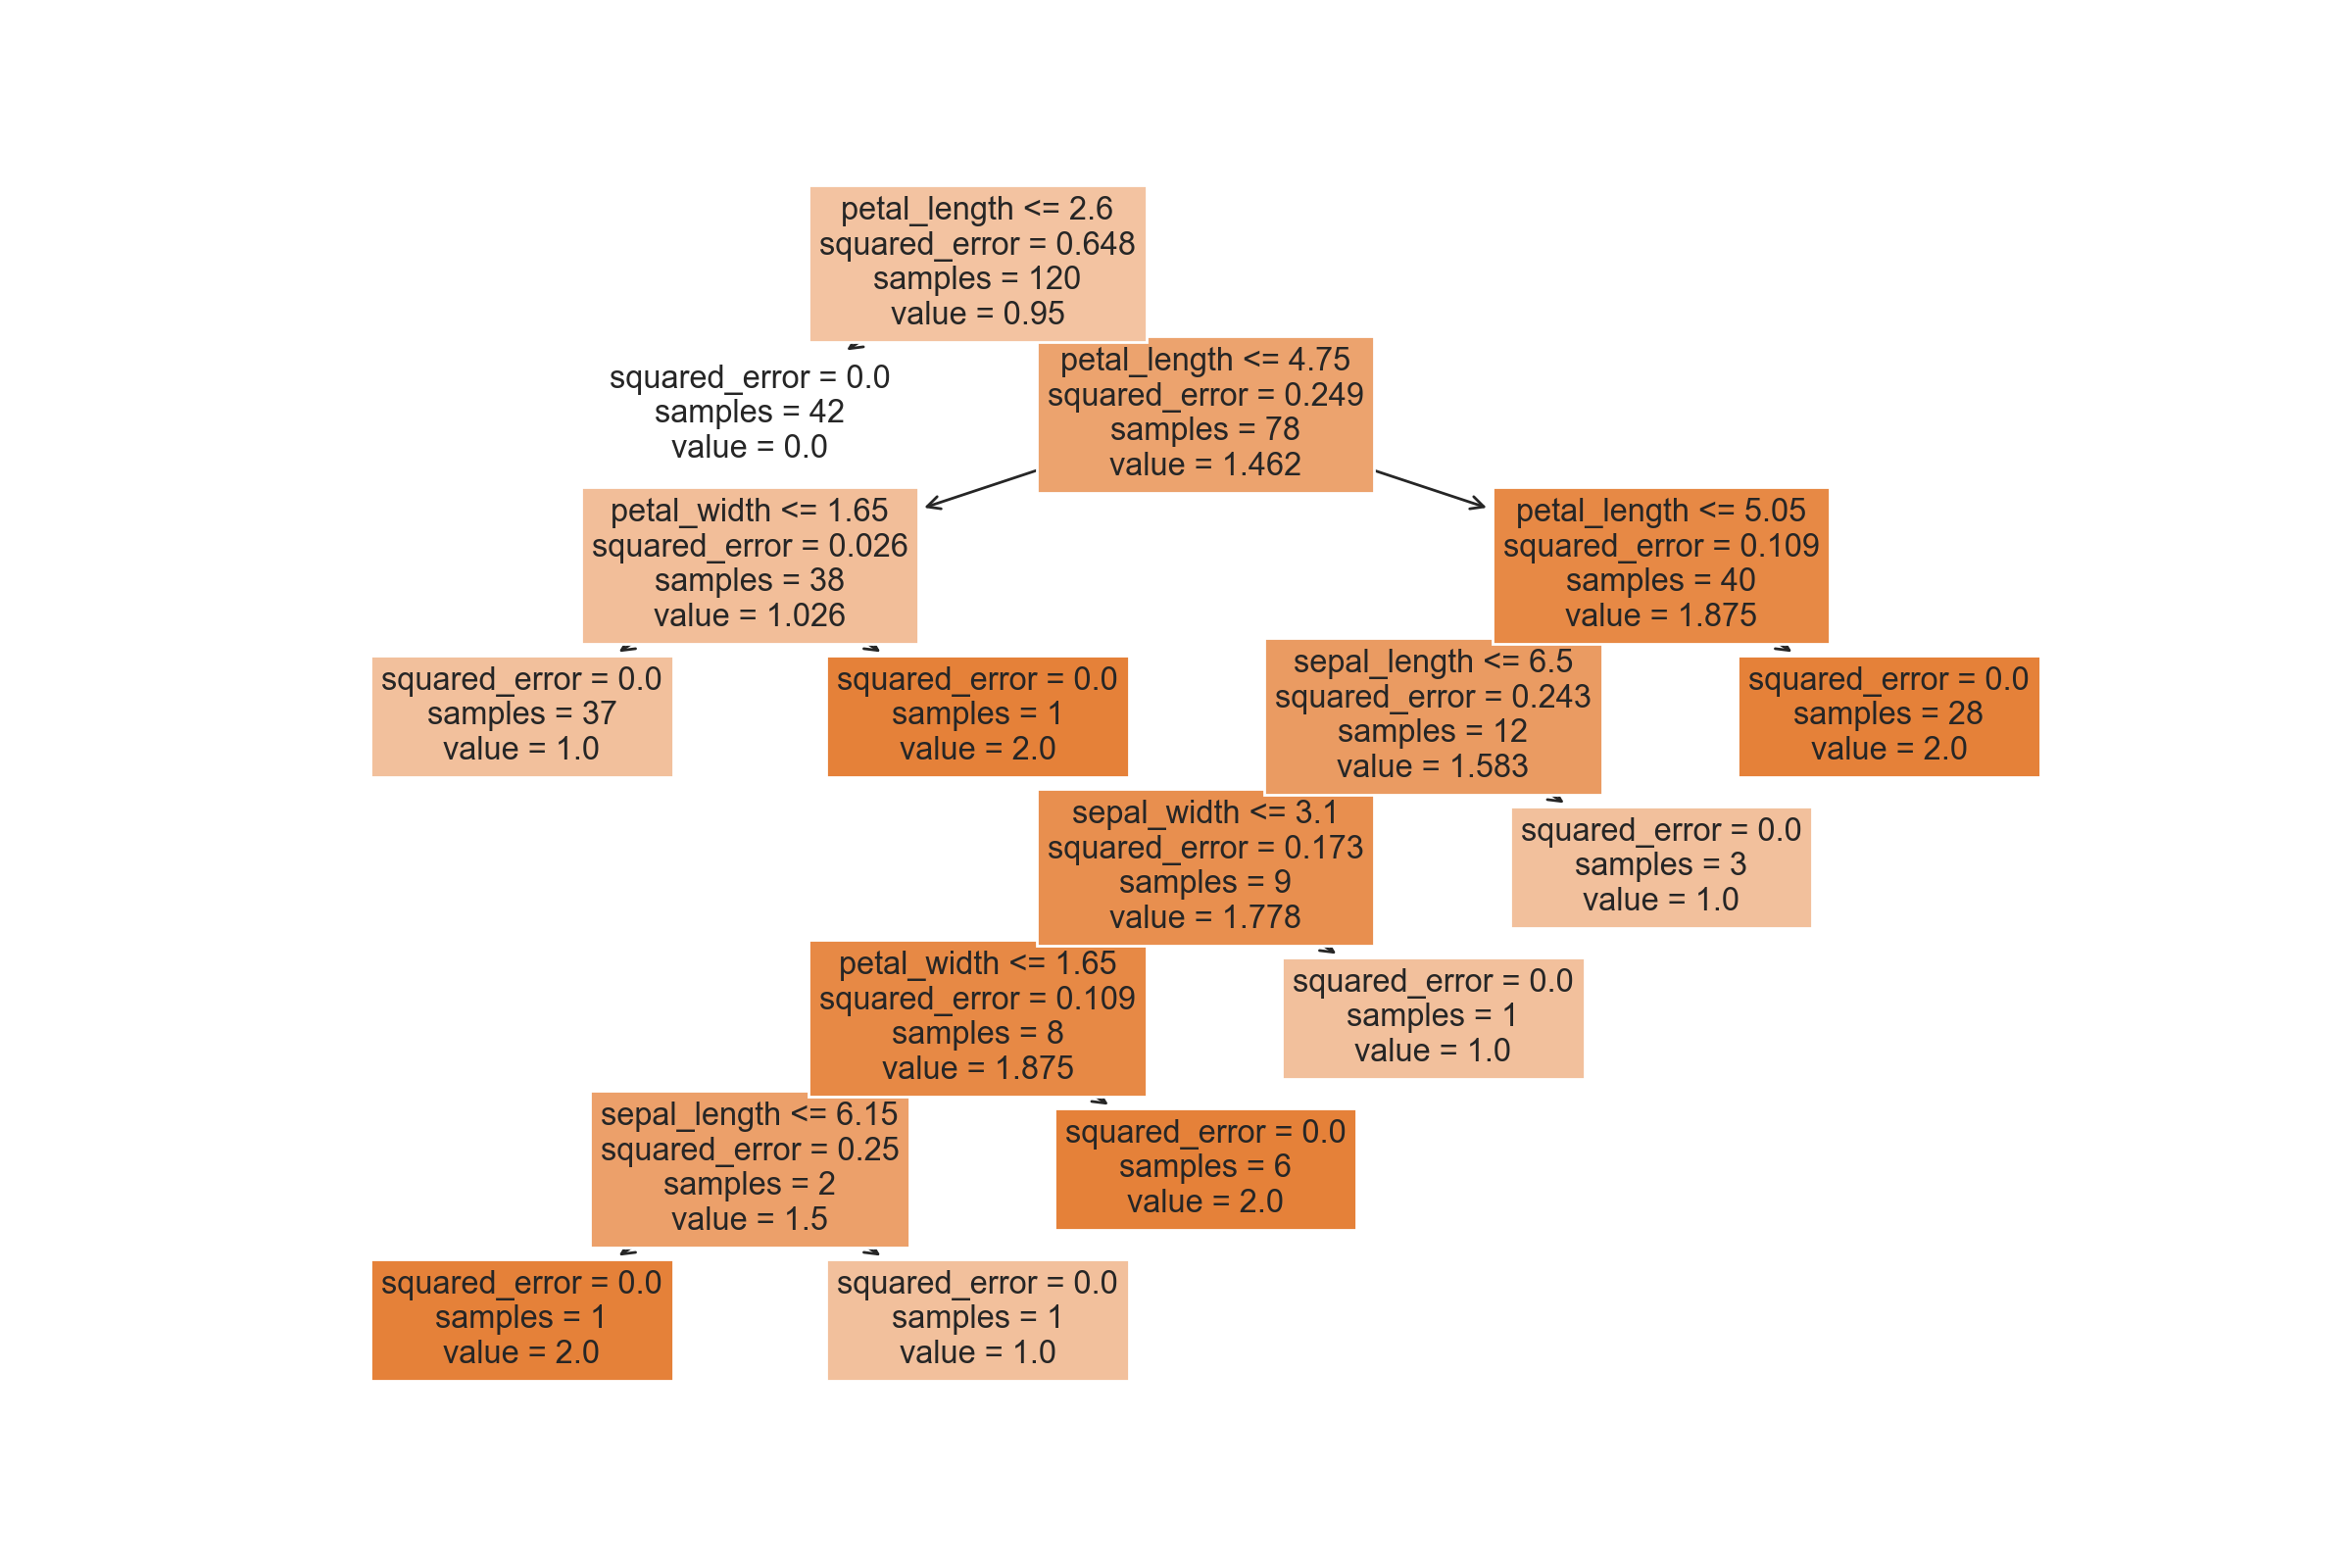

In [164]:
#Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_dt}')

# Visualize the Decision Tree (optional)
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=x.columns)
plt.show()

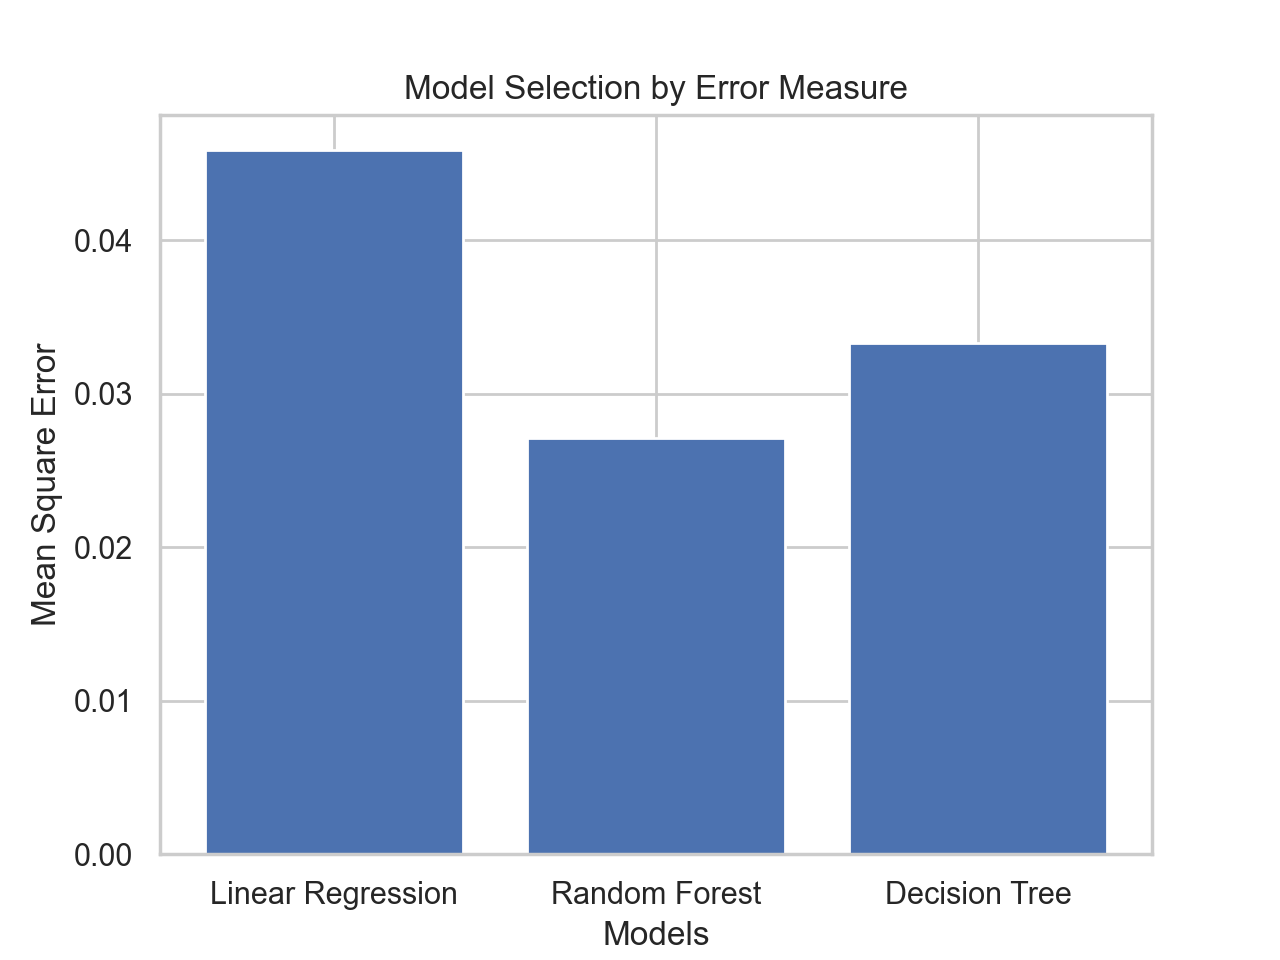

In [169]:
#Bar chart for MSE of above fitted models
plt.bar(["Linear Regression", "Random Forest", "Decision Tree"], [mse_lr, mse_rf, mse_dt])
plt.xlabel('Models')
plt.ylabel('Mean Square Error')
plt.title('Model Selection by Error Measure')
plt.show()

The model fitted through random forest algorithm have a least MSE so we may say that the RF model is a best fitted one. 